In [1]:
# Cobb-Douglas regression and Penn World Table

#The following code is in Pandas - a more advanced data science library you are not required to know.
#Just understanding the outputs of the following cells should be good!

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

pwt = pd.read_excel('pwt100.xls', sheet_name='Data')

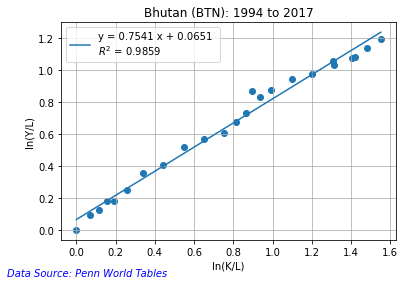

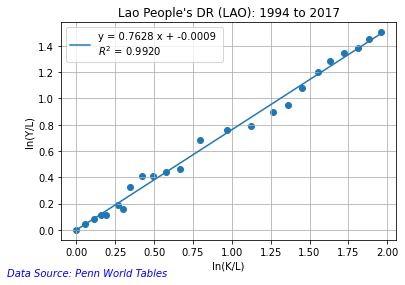

In [2]:
#Graphs of ln(Y/L) vs ln(K/L)
begin_date = 1994
end_date = 2017
ccodes = pwt.countrycode.unique().tolist()
ccodes =['BTN','LAO']
for ccode in ccodes:
    first = pwt.loc[pwt["countrycode"] == ccode]
    second = first[ (first['year'] >= begin_date) & (first['year'] <= end_date) ]
    third = {}
    third['Y'] = second['cgdpe'] / second['cgdpe'].iloc[0]
    third['K'] = second['cn'] / second['cn'].iloc[0]
    third['L'] = second['emp'] / second['emp'].iloc[0]
    third['YL'] = third['Y'] /third['L']
    third['KL'] = third['K'] /third['L']
    third['lnYL'] = np.log(third['YL'])
    third['lnKL'] = np.log(third['KL'])
    third = pd.DataFrame(third)
    third = third.dropna()
    if(len(third)>0):
        f = plt.figure()
        ax = f.add_subplot(111)
        ax.scatter(third['lnKL'], third['lnYL'], label='')
        m, b, r_value, p_value, std_err = scipy.stats.linregress(third['lnKL'], third['lnYL'])
        ax.plot(third['lnKL'], m*third['lnKL'] + b, label='y = %.4f x + %.4f \n$R^2$ = %.4f' %(m, b, r_value**2))
        ax.legend()
        ax.set_xlabel('ln(K/L)')
        ax.set_ylabel('ln(Y/L)')
        plt.grid()
        ax.set_title(second['country'].iloc[0] + ' (' + ccode + '): '+ str(begin_date) + ' to '+ str(end_date))
        ax.text(0.0, 0.0, "Data Source: Penn World Tables", color='blue', fontstyle='italic', transform=f.transFigure)
        plt.savefig('Cobb-Douglas-' + ccode + '.png')
        plt.show()

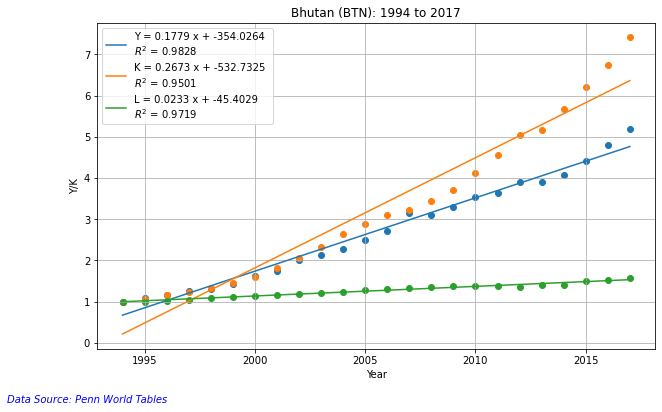

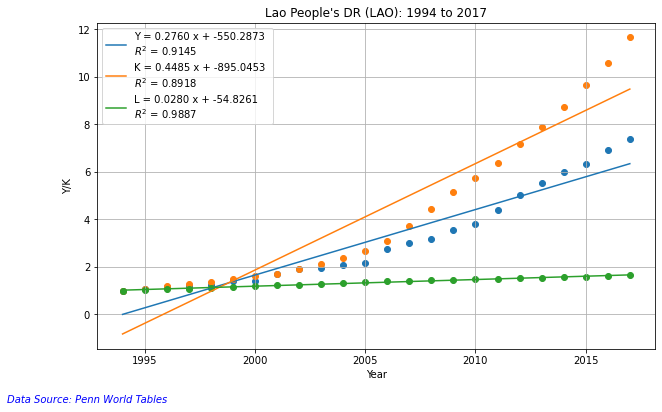

In [3]:
#Graphs of Y and K vs time
begin_date = 1994
end_date = 2017
ccodes = pwt.countrycode.unique().tolist()
ccodes =['BTN','LAO']
for ccode in ccodes:
    first = pwt.loc[pwt["countrycode"] == ccode]
    second = first[ (first['year'] >= begin_date) & (first['year'] <= end_date) ]
    third = {}
    third['year'] = second['year']
    third['Y'] = second['cgdpe'] / second['cgdpe'].iloc[0]
    third['K'] = second['cn'] / second['cn'].iloc[0]
    third['L'] = second['emp'] / second['emp'].iloc[0]
    third['YL'] = third['Y'] /third['L']
    third['KL'] = third['K'] /third['L']
    third['lnYL'] = np.log(third['YL'])
    third['lnKL'] = np.log(third['KL'])
    third = pd.DataFrame(third)
    third = third.dropna()
    if(len(third)>0):
        f = plt.figure(figsize=(10,6))
        ax = f.add_subplot(111)
        ax.scatter(third['year'], third['Y'], label='')
        m_y, b_y, r_value_y, p_value_y, std_err_y = scipy.stats.linregress(third['year'], third['Y'])
        ax.plot(third['year'], m_y*third['year'] + b_y, label='Y = %.4f x + %.4f \n$R^2$ = %.4f' %(m_y, b_y, r_value_y**2))
        ax.scatter(third['year'], third['K'], label='')
        m_k, b_k, r_value_k, p_value_k, std_err_k = scipy.stats.linregress(third['year'], third['K'])
        ax.plot(third['year'], m_k*third['year'] + b_k, label='K = %.4f x + %.4f \n$R^2$ = %.4f' %(m_k, b_k, r_value_k**2))
        ax.scatter(third['year'], third['L'], label='')
        m_l, b_l, r_value_l, p_value_l, std_err_l = scipy.stats.linregress(third['year'], third['L'])
        ax.plot(third['year'], m_l*third['year'] + b_l, label='L = %.4f x + %.4f \n$R^2$ = %.4f' %(m_l, b_l, r_value_l**2))
        ax.legend()
        ax.set_xlabel('Year')
        ax.set_ylabel('Y/K')
        plt.grid()
        ax.set_title(second['country'].iloc[0] + ' (' + ccode + '): '+ str(begin_date) + ' to '+ str(end_date))
        ax.text(0.0, 0.0, "Data Source: Penn World Tables", color='blue', fontstyle='italic', transform=f.transFigure)
        plt.savefig('Cobb-Douglas-' + ccode + '.png')
        plt.show()